<a href="https://colab.research.google.com/github/CYunYin/Decision-Tree-Lesson/blob/main/Lesson_51_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification: Decision Tree

To implement a Decision Tree algorithm using scikit-learn with the given data, we will perform the following steps:

1. Convert categorical data: Encode the categorical features (Plays Sports, Drinks Coffee, Enjoys Hiking) into numerical values.
2. Prepare data: Define the features (X) and target variable (y). For this example, let's predict Enjoys Hiking.
3. Train-test split: Split the data into training and testing datasets.
4. Train the model: Use the DecisionTreeClassifier to train the model.
5. Evaluate the model: Measure accuracy or other metrics.

`Note: We are going to skip step 3-6 just so we can see the same tree output as the tree we did manually in the excel sheet`

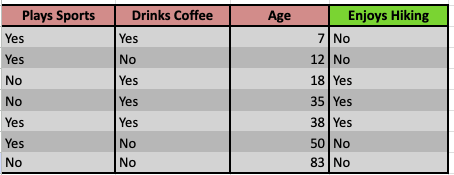

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder #LabelEncoder is able to encode the categorical value to numerical value
from sklearn.metrics import accuracy_score

# Data
data = {
    'Plays Sports': ['Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No'],
    'Drinks Coffee': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No'],
    'Age': [7, 12, 18, 35, 38, 50, 83],
    'Enjoys Hiking': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No']
}

# Convert to DataFrame
import pandas as pd
df = pd.DataFrame(data)

df

,Plays Sports,Drinks Coffee,Age,Enjoys Hiking
0,Yes,Yes,7,No
1,Yes,No,12,No
2,No,Yes,18,Yes
3,No,Yes,35,Yes
4,Yes,Yes,38,Yes
5,Yes,No,50,No
6,No,No,83,No


In [14]:
# Encode categorical data

label_encoders = {} # Creating a dictionary to put in the values of the labelencoder or label encoder information.

# changing categorical values (Yes/No) into (1/0)

# why we do it?
# 1. Machine Learning (ML) models need numbers (most ML algorithms can't handle non-numerical data directly)
# 2. Efficiency in processing (simplifies data processing)

for columns in ['Plays Sports','Drinks Coffee','Enjoys Hiking']:
  le = LabelEncoder() # Le label encoder object from the LabelEncoder() class
  df[columns] = le.fit_transform(df[columns]) # Converting the categorical values to numerical values
  label_encoders[columns]=le # Assign the columns to the label class for the label encoder information so that we are able to retrieve it later

print(label_encoders)
# The dictionary stores all the encoding information
# {'Plays Sports': LabelEncoder(),'Drinks Coffee': LabelEncoder(),'Enjoys Hiking':LabelEncoder()}

{'Plays Sports': LabelEncoder(), 'Drinks Coffee': LabelEncoder(), 'Enjoys Hiking': LabelEncoder()}


In [15]:
# Features (X) and target (y)
X = df[['Plays Sports','Drinks Coffee','Age']] # Input
y = df['Enjoys Hiking'] # Output

# Train Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X,y)

DecisionTreeClassifier(random_state=42)

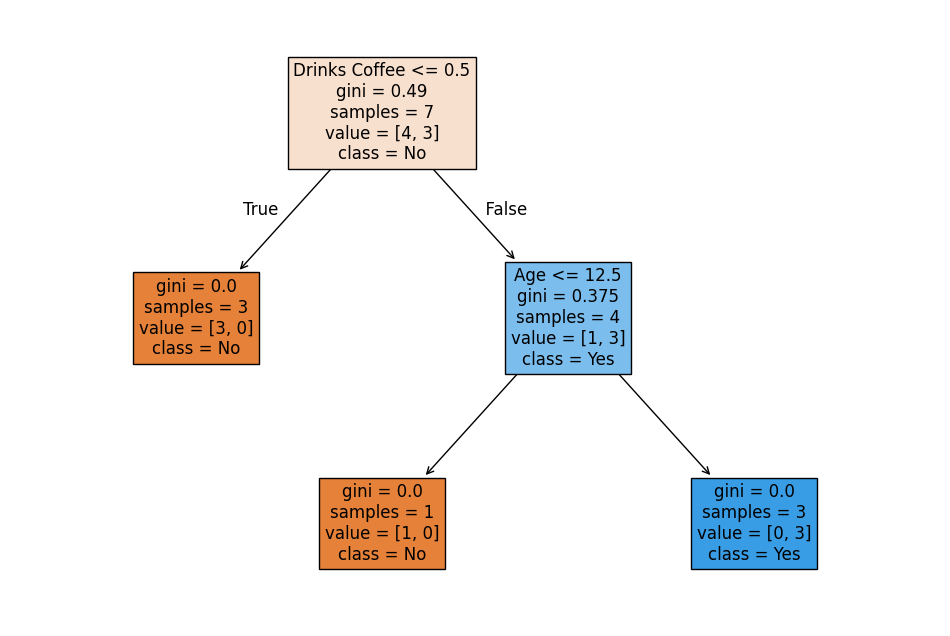

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # Plot tree help to plot the decision tree

plt.figure(figsize=(12,8)) # Creating a blank figure
plot_tree(clf,
          feature_names=['Plays Sports','Drinks Coffee','Age'],
          class_names=label_encoders['Enjoys Hiking'].classes_,
          filled= True,
          fontsize=12
          )

plt.show()

It is the same as our manual output done earlier in our excel sheet.

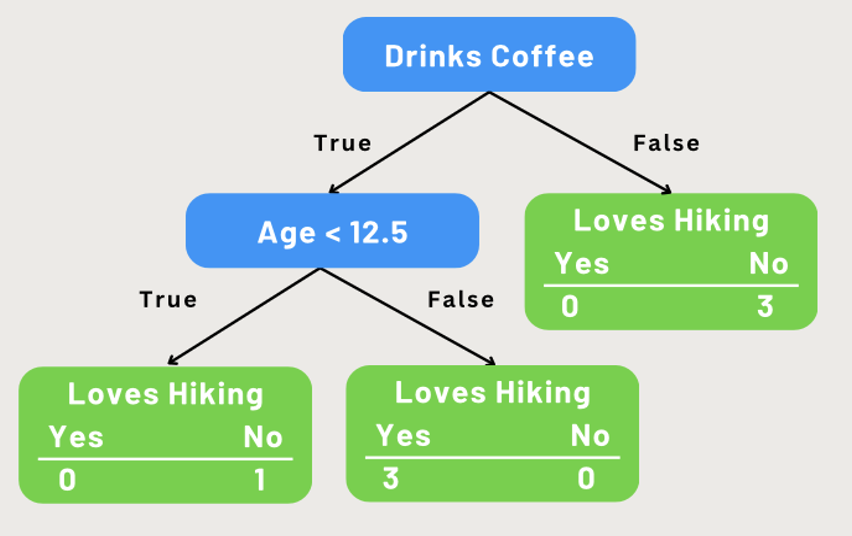

# Problem

Currently, this is prone to `overfitting`.

We will discuss the problems in details.

We will also discuss techniques like `pruning` & `cross validation` next lesson.